# Customer Churn Prediction

# Business problem

In [1]:
#In The Banking They Wants to Retain There Existing Customer Who Churn ,so that they know which existing customer has 
#the highest probability of leaving the bank

# DATA

In [2]:
# We have 10000 row and 14 Feature. Every Row tells us different customer details and whether they churned or not not

# Machine Learning Problem

In [3]:
# So Converting a Business problem to a machine learning problem , this seems to be a simple binary classification problem
# in which we have 2 classes "0" for who are stay and "1" for who are Churned. We have some numerical feature ,some categorical 
# feature

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [5]:
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
df.shape

(10000, 14)

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# 1 is who people Churned
# 0 is who people is stayed

In [11]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]
df_categorical=df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

In [16]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [17]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,2,1,1,1
1,Spain,Female,1,1,0,1
2,France,Female,8,3,1,0
3,France,Female,1,2,0,0
4,Spain,Female,2,1,1,1
...,...,...,...,...,...,...
9995,France,Male,5,2,1,0
9996,France,Male,10,1,1,1
9997,France,Female,7,1,0,1
9998,Germany,Male,3,2,1,0


# EDA (Exploratory Data Analysis)

In [18]:
# #1] Univariable analysis
## 2] Bivariable analysis

# EDA for numerical features

In [19]:
# we are doing EDA for numerical feature

In [20]:
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

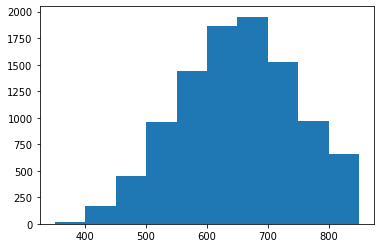

In [21]:
plt.hist(df_numerical['CreditScore'])

# Observation

In [22]:
# 1] There are less people which have credit score less than 400
# 2] there are less people which have credit score more than 800
# 3] Most of the people have credit card between 600 to 700
# 4] Credit score given us hints to normal distribution curve

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

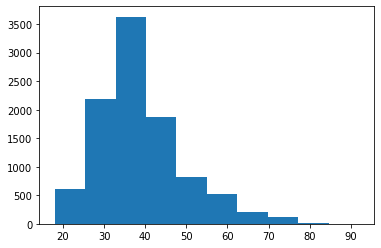

In [23]:
plt.hist(df_numerical['Age'])

# Observation

In [24]:
# 1]Credit score given us hints to follow the Right Skweed
# 2]If we are convert right skweed to Bell cure then we use log
# 3]There are less people which have Age less than 30
# 4] there are less people which have Age more than 50
# 5] Most of the people have Age between 30 to 40

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 10 Patch objects>)

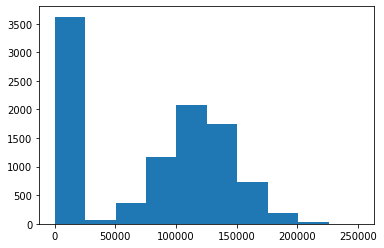

In [25]:
plt.hist(df_numerical["Balance"])

In [26]:
df['Balance'].value_counts()

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

# Observation

In [27]:
# 1] There are 3617 people who are 0 Balance in there bank account
# 2] Most of the People have Balance is between 100000 to 150000
# 3] There are less No. of people who have Balance less than 50000 and more than 200000

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 10 Patch objects>)

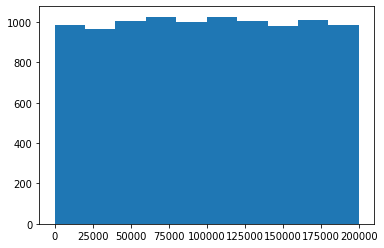

In [28]:
plt.hist(df_numerical['EstimatedSalary'])

# Observation

In [29]:
# 1] In this plot there is no difference between no. of customer and in different salary range

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

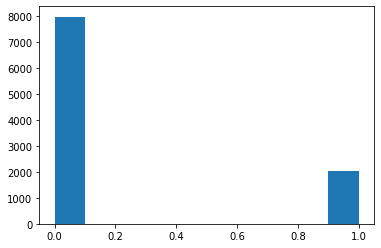

In [30]:
plt.hist(df_numerical['Exited'])

# Violin Plot

<function matplotlib.pyplot.show(*args, **kw)>

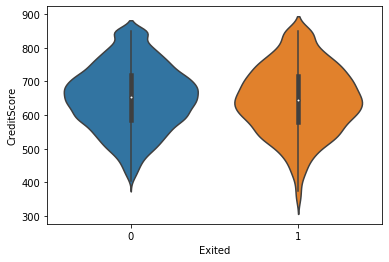

In [31]:
sns.violinplot(x='Exited',y='CreditScore',data=df_numerical)
plt.show

In [32]:
# 1] Violoin Plot is Combination Of Box Plot and PDF
# 2] here this graph not helping Extract meaningfull information from data

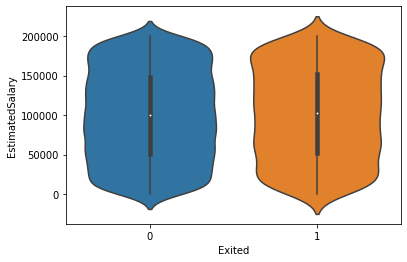

In [33]:
sns.violinplot(x='Exited',y='EstimatedSalary',data=df_numerical)

# Observation

In [34]:
# 1] This graph is not usefull to exttract meaning full information from the data 

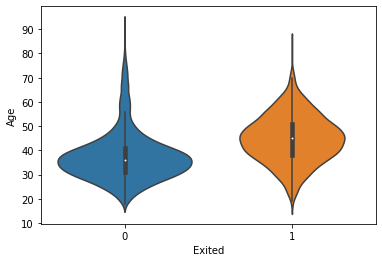

In [35]:
sns.violinplot(x='Exited',y='Age',data=df_numerical)

# Observation

In [36]:
# 1] Violoin Plot is Combination Of Box Plot and PDF
# 2] here this graph not helping Extract meaningfull information from data

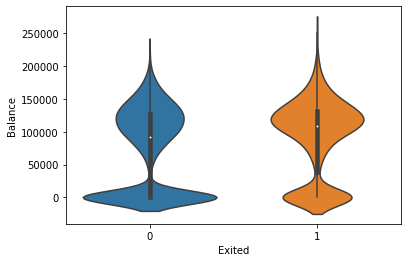

In [37]:
sns.violinplot(x='Exited',y='Balance',data=df_numerical)

# observation

# PDF

C:\Users\vishal vangala\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


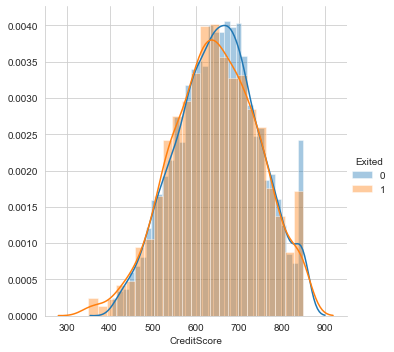

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited",size=5) \
   .map(sns.distplot, "CreditScore")\
   .add_legend();
plt.show();

# Observation

In [39]:
#PDf of Credit Score is not Differentiat between Customer who Stayed or Left 

C:\Users\vishal vangala\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


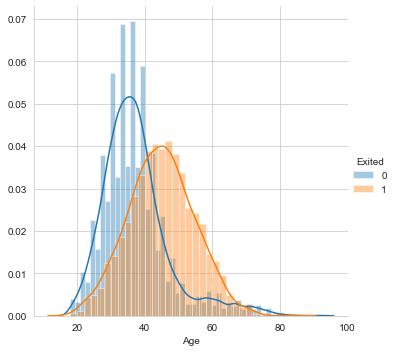

In [40]:
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited",size=5) \
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show();

# Observation

In [41]:
# 1] Age is below 40 Most Of the People are Stay
# 2] Age is above 40 Most of the people are left

C:\Users\vishal vangala\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


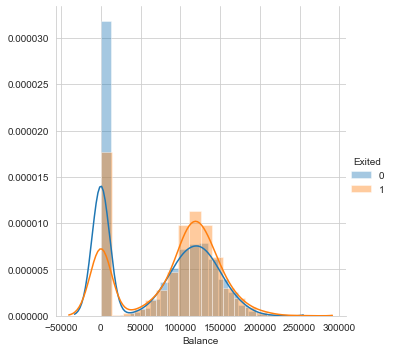

In [42]:
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited",size=5) \
   .map(sns.distplot, "Balance")\
   .add_legend();
plt.show();

#  Observation

In [43]:
# 1] Most of the people have 0 balance in there Bank Account
# 2] the Balance above 50000 majority of the customer are Left

C:\Users\vishal vangala\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


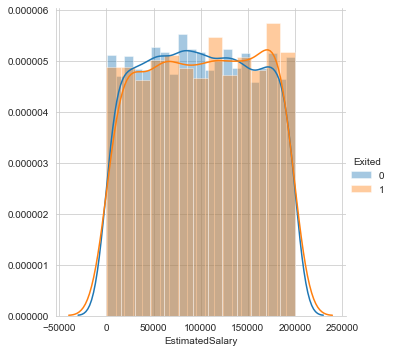

In [44]:
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited",size=5) \
   .map(sns.distplot, "EstimatedSalary")\
   .add_legend();
plt.show();

# Observation

In [45]:
# 1] This graph is not usefull to exttract meaning full information from the data 

# BOX PLOT

<function matplotlib.pyplot.show(*args, **kw)>

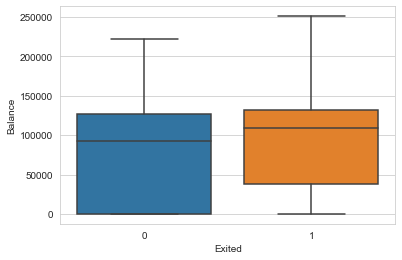

In [46]:
sns.boxplot(x='Exited', y='Balance',data=df_numerical)
plt.show

# OBSERVATION

In [47]:
# 1] The Bank Balance Of Customer Below 50000 are Stay

<function matplotlib.pyplot.show(*args, **kw)>

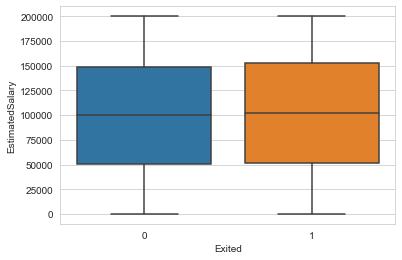

In [48]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=df_numerical)
plt.show

# Observation

In [49]:
# 1] Both boxplot (stay or churnd) are almost same so this graph not useful

<function matplotlib.pyplot.show(*args, **kw)>

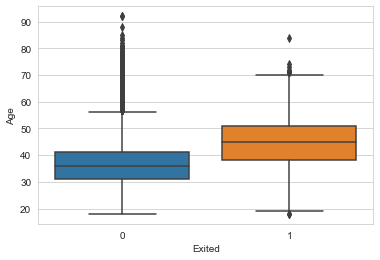

In [50]:
sns.boxplot(x='Exited',y="Age",data=df_numerical)
plt.show

# observation

In [51]:
# 1] the people who age is below 35 are alomst Stay

<function matplotlib.pyplot.show(*args, **kw)>

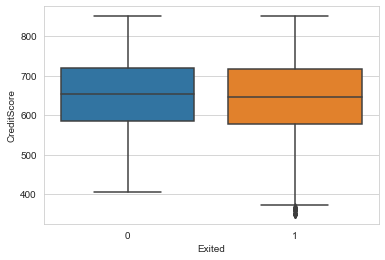

In [52]:
sns.boxplot(x='Exited',y="CreditScore",data=df_numerical)
plt.show

# Observation

In [53]:
# 1]people who  Credit Score below 400 are Left
# 2]

# Bi Variant Analysis

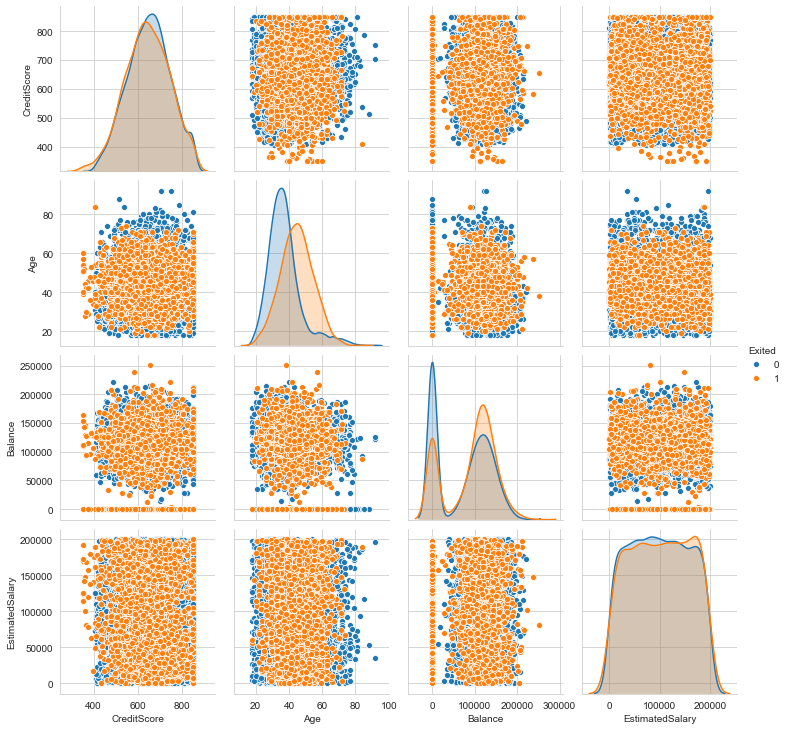

In [54]:
sns.pairplot(df_numerical,hue='Exited')

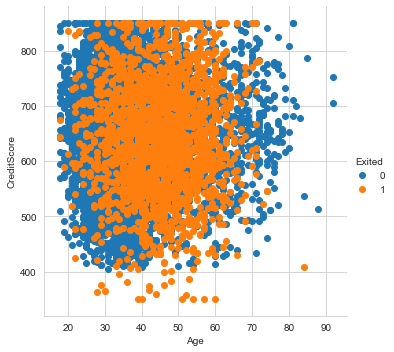

In [55]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","CreditScore")\
   .add_legend();
plt.show();

# Observation

In [56]:
# 1] In the center , circular region most of the people are left

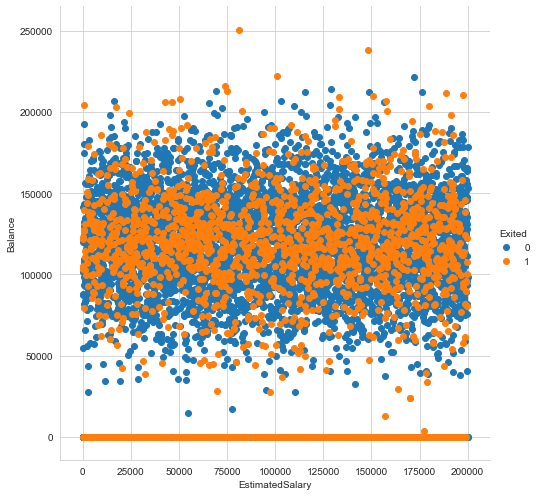

In [57]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=7) \
   .map(plt.scatter, "EstimatedSalary","Balance")\
   .add_legend();
plt.show();

# Observation

In [58]:
# 1] the people who balance between 100000 to 150000 are alomst left

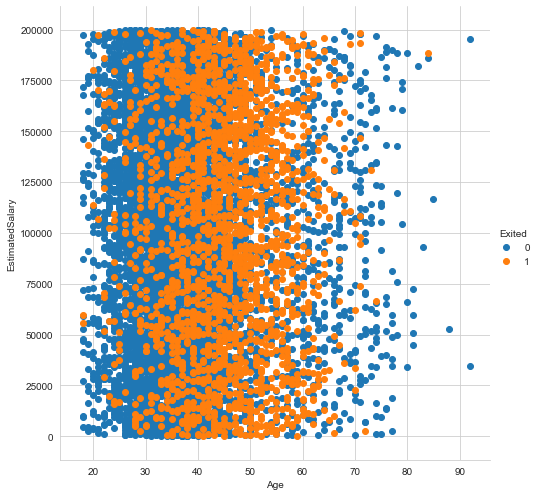

In [59]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=7) \
   .map(plt.scatter, "Age","EstimatedSalary")\
   .add_legend();
plt.show();

# Observation

In [60]:
# 1]the people who age below 30 and greater  than 60 are almost Stay
# 2] the people who age between 40 to 60 are almost left

# scaling of numerical features

In [61]:
 # Now we gonna do scaling of numerical features..

In [62]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS= scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
Balance= scaling.fit_transform(df_numerical[['Balance']])

ES=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore'] = CS

df_numerical['Age'] = age

df_numerical['Balance'] =Balance

df_numerical['EstimatedSalary'] =ES

In [64]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Categorical Feature

In [65]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,France,Female,2,1,1,1
1,Spain,Female,1,1,0,1
2,France,Female,8,3,1,0
3,France,Female,1,2,0,0
4,Spain,Female,2,1,1,1
...,...,...,...,...,...,...
9995,France,Male,5,2,1,0
9996,France,Male,10,1,1,1
9997,France,Female,7,1,0,1
9998,Germany,Male,3,2,1,0


# ONE HOT ENCODING

In [66]:
categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=True)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,0,0,0
1,1,1,0,1,0,1,0
2,8,3,1,0,0,0,0
3,1,2,0,0,0,0,0
4,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1
9996,10,1,1,1,0,0,1
9997,7,1,0,1,0,0,0
9998,3,2,1,0,1,0,1


# Numberofproducts

In [67]:
import warnings
warnings.filterwarnings("ignore")
a=df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [68]:
# 1] no. of customer id decreasing as the number of products is increasing

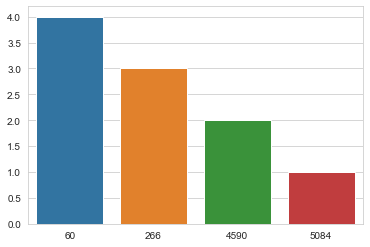

In [69]:
sns.barplot(x=a.values,y=a.index)

# Observation

In [70]:
# 1] no. of customer id decreasing as the number of products is increasing

(-1.1059349205019084,
 1.1002826158397652,
 -1.116497450906123,
 1.1041122438861788)

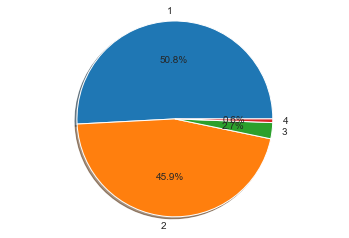

In [71]:
labels = a.index
sizes =a.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation

In [72]:
# 1] no. of products 1 = 50.8%
# 2] no. of products 2 = 45.9%
# 3]no. of products 3 = 27%
# 4]no. of products 4 = 0.6%

# HasCrCard

In [73]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['HasCrCard'].value_counts()
b


1    7055
0    2945
Name: HasCrCard, dtype: int64

In [74]:
#Here 1 means all the people who does not have credit card

# and 0 means all the people who does have credit card

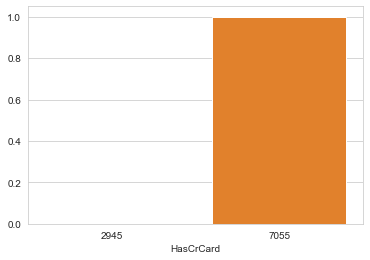

In [75]:
sns.barplot(b,b.index)
plt.show()

# Observation

In [76]:
# 1] Most of the people have does not creadit card

(-1.1179836976946826,
 1.1008563665568896,
 -1.1127024981118583,
 1.1140147351863388)

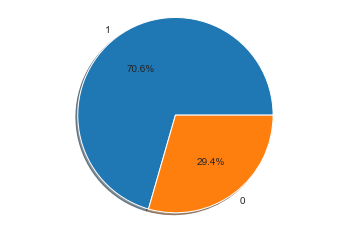

In [77]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

In [78]:
# 1] 70.6% people have does not credit card
# 2] 29.4% people have creadit card

# MEAN,MEDIAN AND PERCENTILE

In [79]:
stayed=df[df['Exited']==0]
#pick those rows which have exited column =0
left=df[df['Exited']==1]
#these are the people who have churned,exited column=1
stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


# CreaditScore

In [80]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(stayed["CreditScore"]))# people who have stayed
print(np.mean(left["CreditScore"]))# people who have left


#median
print("Median")
print(np.median(stayed["CreditScore"]))# people who have stayed
print(np.median(left["CreditScore"]))# people who have left


print("\nStd-dev:");
print(np.std(stayed["CreditScore"]))
print(np.std(left["CreditScore"]))

Means:
651.8531960316463
645.3514972999509
Median
653.0
646.0

Std-dev:
95.64783071535247
100.29687481012597


# AGE

In [81]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(stayed["Age"]))# people who have stayed
print(np.mean(left["Age"]))# people who have left


#median
print("Median")
print(np.median(stayed["Age"]))# people who have stayed
print(np.median(left["Age"]))# people who have left


print("\nStd-dev:");
print(np.std(stayed["Age"]))
print(np.std(left["Age"]))

Means:
37.40838879819164
44.8379970544919
Median
36.0
45.0

Std-dev:
10.124727115441777
9.759165198147958


In [82]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(stayed["Balance"]))# people who have stayed
print(np.mean(left["Balance"]))# people who have left


#median
print("Median")
print(np.median(stayed["Balance"]))# people who have stayed
print(np.median(left["Balance"]))# people who have left


print("\nStd-dev:");
print(np.std(stayed["Balance"]))
print(np.std(left["Balance"]))

Means:
72745.29677885193
91108.53933726063
Median
92072.68
109349.29

Std-dev:
62844.094322747915
58346.467874478956


In [83]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(stayed["EstimatedSalary"]))# people who have stayed
print(np.mean(left["EstimatedSalary"]))# people who have left


#median
print("Median")
print(np.median(stayed["EstimatedSalary"]))# people who have stayed
print(np.median(left["EstimatedSalary"]))# people who have left


print("\nStd-dev:");
print(np.std(stayed["EstimatedSalary"]))
print(np.std(left["EstimatedSalary"]))

Means:
99738.39177194514
101465.6775306824
Median
99645.04
102460.84

Std-dev:
57401.982332801934
57898.201201044954


In [84]:
# steps to do

#1. joining my numerical and categorical features
#2. train, cv,test 
#3. individual algorithm
#4. testing of the performance
#5. Conclusion

In [85]:
#joining 

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


In [86]:
df_categorical


,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,0,0,0
1,1,1,0,1,0,1,0
2,8,3,1,0,0,0,0
3,1,2,0,0,0,0,0
4,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1
9996,10,1,1,1,0,0,1
9997,7,1,0,1,0,0,0
9998,3,2,1,0,1,0,1


In [87]:
df_concat2 = pd.concat([df_categorical,df_numerical], axis=1)

df_concat2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,0,0,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,0,0,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,0,0,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,0,0,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,1,0,1,0.844,0.324324,0.299226,0.464429,1


In [88]:
X=df_concat2.iloc[:,0:12]

In [89]:
#sepearting features from classlabels

In [90]:
X

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,0,0,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,0,0,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,0,0,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,0,0,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,1,0,1,0.844,0.324324,0.299226,0.464429,1


In [91]:
Y=df_concat2.iloc[:,11:]

In [92]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [93]:
#train test split
#spliting the data into train and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [94]:
X_train.shape

(8000, 12)

In [95]:
y_train.shape

(8000, 1)

In [96]:
X_test.shape

(2000, 12)

In [97]:
y_test.shape

(2000, 1)

# Modeling

# KNN (Nearest Neighbour)


In [98]:
# We will apply KNN to data and to check the performance

In [99]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
training accuracy is 0.99725
testing accuracy is  0.9905


In [100]:
#PREDICTIONS
knn_test_prediction=modelknn.predict(X_test)#this is your y_pred_test
knn_train_predictions=modelknn.predict(X_train)#y_pred_train

In [101]:
#evaluation
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.9752925877763329
Training f1 score is 0.9932639314145745


In [102]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(y_test,knn_test_prediction)
print(x_knn_cf)

[[1606    1]
 [  18  375]]


Test confusion matrix


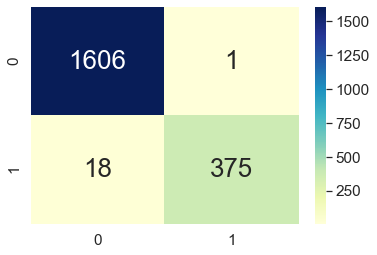

In [103]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [104]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(y_train,knn_train_predictions)
print(x_knn_cf)

[[1606    1]
 [  18  375]]


Train confusion matrix


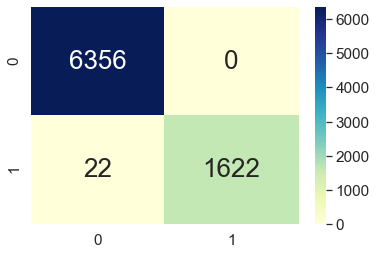

In [105]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [106]:
#Precison
#training data
from sklearn.metrics import precision_score
x_knn_p=precision_score(y_train,knn_train_predictions)
print("The precision of x_knn_p for training data",x_knn_p)

The precision of x_knn_p for training data 1.0


In [107]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_knn_p_test=precision_score(y_test,knn_test_prediction)
print("The precision of x_knn_p for testing data",x_knn_p_test)

The precision of x_knn_p for testing data 0.9973404255319149


In [108]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_knn_r_test=recall_score(y_test,knn_test_prediction)
print("The recall of test data for knn is",x_knn_r_test)

The recall of test data for knn is 0.9541984732824428


In [109]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)

The recall of training data for knn is 0.98661800486618


In [110]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,knn_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,knn_test_prediction)

print("testing accuracy is",b)

training accuracy is 0.99725
testing accuracy is 0.9905


# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))
print(LRmodel.score(X_train,y_train))

#this is accuracy 

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=400, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
1.0
1.0


In [113]:
#PREDICTIONS
lr_test_prediction=LRmodel.predict(X_test)#this is your y_pred_test
lr_train_predictions=LRmodel.predict(X_train)#y_pred_train

In [114]:
#evaluation
from sklearn.metrics import f1_score
X_LR_F1score=f1_score(y_test,lr_test_prediction)
print("Testing f1 score is",X_LR_F1score) #f1 score on test data

X_LR_train_F1score=f1_score(y_train,lr_train_predictions)
print("Training f1 score is",X_LR_train_F1score) #f1 score on train data

Testing f1 score is 1.0
Training f1 score is 1.0


In [115]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_LR_cf=confusion_matrix(y_test,lr_test_prediction)
print(x_LR_cf)

[[1607    0]
 [   0  393]]


Test confusion matrix


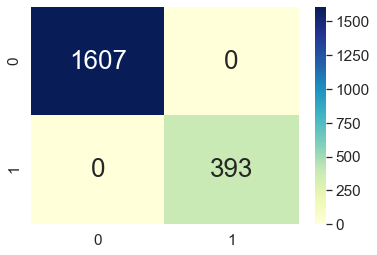

In [116]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LR_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [117]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_LR_cf=confusion_matrix(y_train,lr_train_predictions)
print(x_knn_cf)

[[1606    1]
 [  18  375]]


Train confusion matrix


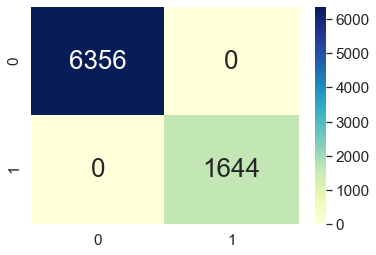

In [118]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LR_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [119]:
#Precison
#training data
from sklearn.metrics import precision_score
x_LR_p=precision_score(y_train,lr_train_predictions)
print("The precision of x_LR_p for training data",x_LR_p)

The precision of x_LR_p for training data 1.0


In [120]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_LR_p_test=precision_score(y_test,lr_test_prediction)
print("The precision of x_LR_p for testing data",x_LR_p_test)

The precision of x_LR_p for testing data 1.0


In [121]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_LR_r_train=recall_score(y_train,lr_train_predictions)
print("The recall of training data for knn is",x_LR_r_train)

The recall of training data for knn is 1.0


In [122]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_LR_r_test=recall_score(y_test,lr_test_prediction)
print("The recall of test data for knn is",x_LR_r_test)

The recall of test data for knn is 1.0


In [123]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,lr_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,lr_test_prediction)

print("testing accuracy is",b)

training accuracy is 1.0
testing accuracy is 1.0


# SVM (Support Vector Machine)

In [124]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
1.0


In [125]:
#PREDICTIONS
S_test_prediction=smodel.predict(X_test)#this is your y_pred_test
S_train_predictions=smodel.predict(X_train)#y_pred_train

In [126]:
#evaluation
from sklearn.metrics import f1_score
X_S_F1score=f1_score(y_test,S_test_prediction)
print("Testing f1 score is",X_S_F1score) #f1 score on test data

X_S_train_F1score=f1_score(y_train,S_train_predictions)
print("Training f1 score is",X_S_train_F1score) #f1 score on train data

Testing f1 score is 1.0
Training f1 score is 1.0


In [127]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_S_cf=confusion_matrix(y_test,S_test_prediction)
print(x_S_cf)

[[1607    0]
 [   0  393]]


Test confusion matrix


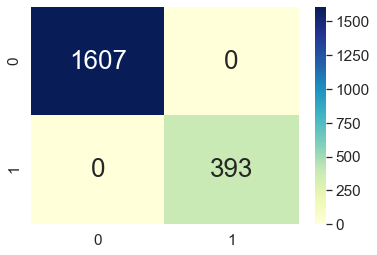

In [128]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_S_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [129]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_S_cf_train=confusion_matrix(y_train,S_train_predictions)
print(x_S_cf_train)

[[6356    0]
 [   0 1644]]


Test confusion matrix


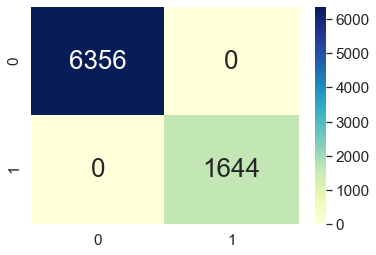

In [130]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_S_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [131]:
#Precison
#training data
from sklearn.metrics import precision_score
x_S_p=precision_score(y_train,S_train_predictions)
print("The precision of x_S_p for training data",x_S_p)

The precision of x_S_p for training data 1.0


In [132]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_S_p_test=precision_score(y_test,S_test_prediction)
print("The precision of x_S_p for testing data",x_S_p_test)

The precision of x_S_p for testing data 1.0


In [133]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_S_r_test=recall_score(y_test,S_test_prediction)
print("The recall of test data for SVM is",x_S_r_test)

The recall of test data for SVM is 1.0


In [134]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_S_r_train=recall_score(y_train,S_train_predictions)
print("The recall of training data for SVM is",x_S_r_train)

The recall of training data for SVM is 1.0


In [135]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,S_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,S_test_prediction)

print("testing accuracy is",b)

training accuracy is 1.0
testing accuracy is 1.0


# DECISION TREE

In [136]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
1.0
1.0


In [137]:
#PREDICTIONS
model_test_prediction=model.predict(X_test)#this is your y_pred_test
model_train_predictions=model.predict(X_train)#y_pred_train

In [138]:
#evaluation
from sklearn.metrics import f1_score
X_model_F1score=f1_score(y_test,model_test_prediction)
print("Testing f1 score is",X_model_F1score) #f1 score on test data

X_model_train_F1score=f1_score(y_train,model_train_predictions)
print("Training f1 score is",X_model_train_F1score) #f1 score on train data

Testing f1 score is 1.0
Training f1 score is 1.0


In [139]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_model_cf_test=confusion_matrix(y_test,model_test_prediction)
print(x_model_cf_test)

[[1607    0]
 [   0  393]]


Test confusion matrix


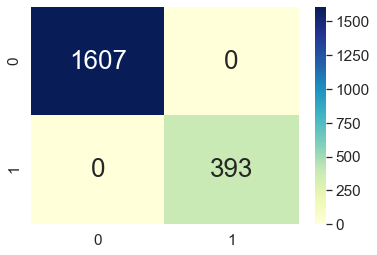

In [140]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_model_cf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [141]:
# confusion matrix
#train confusion matrix
from sklearn.metrics import confusion_matrix
x_model_cf_train=confusion_matrix(y_train,model_train_predictions)
print(x_model_cf_train)

[[6356    0]
 [   0 1644]]


Train confusion matrix


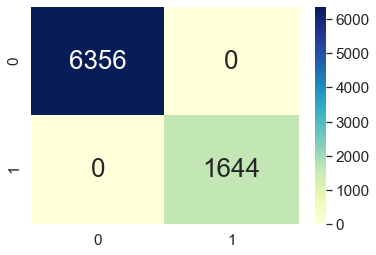

In [142]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_model_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [143]:
#Precison
#training data
from sklearn.metrics import precision_score
x_model_p=precision_score(y_train,model_train_predictions)
print("The precision of x_model_p for training data",x_model_p)

The precision of x_model_p for training data 1.0


In [144]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_model_p_test=precision_score(y_test,model_test_prediction)
print("The precision of x_model_p for testing data",x_model_p_test)

The precision of x_model_p for testing data 1.0


In [145]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_model_r_test=recall_score(y_test,model_test_prediction)
print("The recall of test data for model is",x_model_r_test)

The recall of test data for model is 1.0


In [146]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_model_r_train=recall_score(y_train,model_train_predictions)
print("The recall of training data for model is",x_model_r_train)

The recall of training data for model is 1.0


In [147]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,model_train_predictions)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,model_test_prediction)

print("testing accuracy is",b)


training accuracy is 1.0
testing accuracy is 1.0


# Random Forest

In [148]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [149]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 4, 'n_estimators': 200}


In [150]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [151]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [152]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test)
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train)
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 1.0
Training f1 score is 1.0


In [153]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_train=confusion_matrix(y_train,rf_predictions_train)
print(x_rf_train)

[[6356    0]
 [   0 1644]]


Train confusion matrix


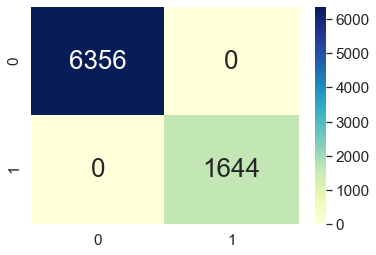

In [154]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [155]:
from sklearn.metrics import confusion_matrix
x_rf_test=confusion_matrix(y_test,rf_predictions_test)
print(x_rf_test)

[[1607    0]
 [   0  393]]


Test confusion matrix


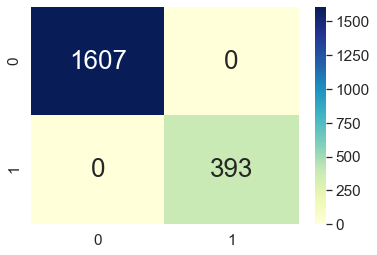

In [156]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [157]:
#Precison
#training data
from sklearn.metrics import precision_score
x_rf_p=precision_score(y_train,rf_predictions_train)
print("The precision of x_rf_p for training data",x_rf_p)

The precision of x_rf_p for training data 1.0


In [158]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_rf_p_test=precision_score(y_test,rf_predictions_test)
print("The precision of x_rf_p for testing data",x_rf_p_test)

The precision of x_rf_p for testing data 1.0


In [159]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_rf_r_test=recall_score(y_test,rf_predictions_test)
print("The recall of test data for rf is",x_rf_r_test)

The recall of test data for rf is 1.0


In [160]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_rf_r_train=recall_score(y_train,rf_predictions_train)
print("The recall of training data for rf is",x_rf_r_train)

The recall of training data for rf is 1.0


In [161]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,rf_predictions_train)

print("training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,rf_predictions_test)

print("testing accuracy is",b)

training accuracy is 1.0
testing accuracy is 1.0


In [162]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","F1","PRECISION","RECALL"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], [" 99%"," 73.5%","71.61%", "87%", "51.2%"])
myTable.add_column(columns[2], ["100% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[3], ["100% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[4], ["95% ","23.5%","55.7%", "78.5%","51%"])



print(myTable)

ModuleNotFoundError: No module named 'prettytable'

In [ ]:
from prettytable import PrettyTable